<a href="https://colab.research.google.com/github/itssofiarce/MINERIA/blob/main/TP2_Mineria_Arce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico Minería de Datos 2024
## Docentes
- Spetale, Flavio
- Pellerejo, Ivan
- Gatti, Ramiro

## Integrante
- Sofía Arce


# Preparacion del entorno

In [1]:
import os

REPO_NAME = "MINERIA"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/itssofiarce/MINERIA.git
  os.chdir(REPO_NAME)

Cloning into 'MINERIA'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 68 (delta 15), reused 11 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (68/68), 3.13 MiB | 4.11 MiB/s, done.
Resolving deltas: 100% (15/15), done.


# Librerías


In [2]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Analisis exploratorio - Companies dataset


In [3]:
df = pd.read_csv('/content/MINERIA/tp2_2024/1000_Companies.csv')

In [4]:
df.head()

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.describe()

,RyD_Spend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [7]:
df.isna().sum()

,0
RyD_Spend,0
Administration,0
MarketingSpend,0
State,0
Profit,0


### Distribucion de las variables


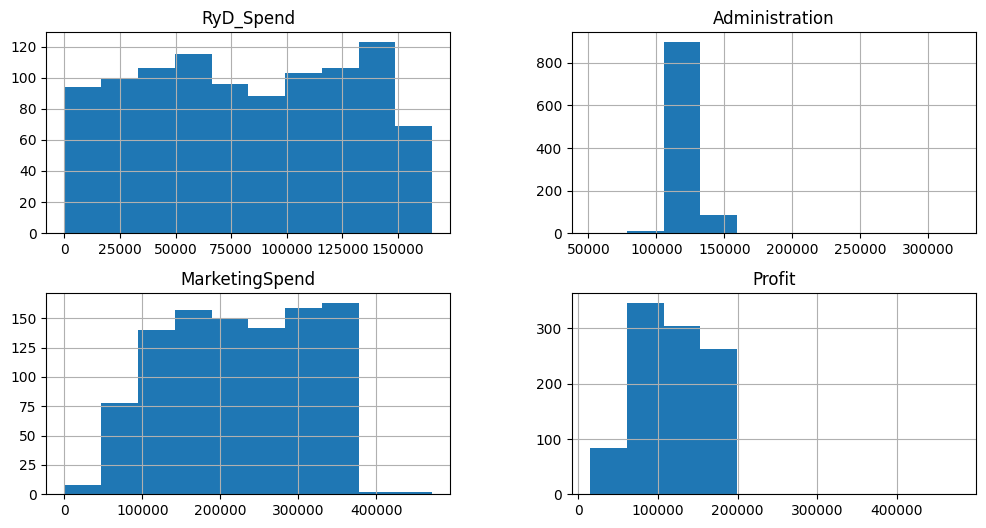

In [8]:
df.hist(figsize=(12, 6))
plt.show()

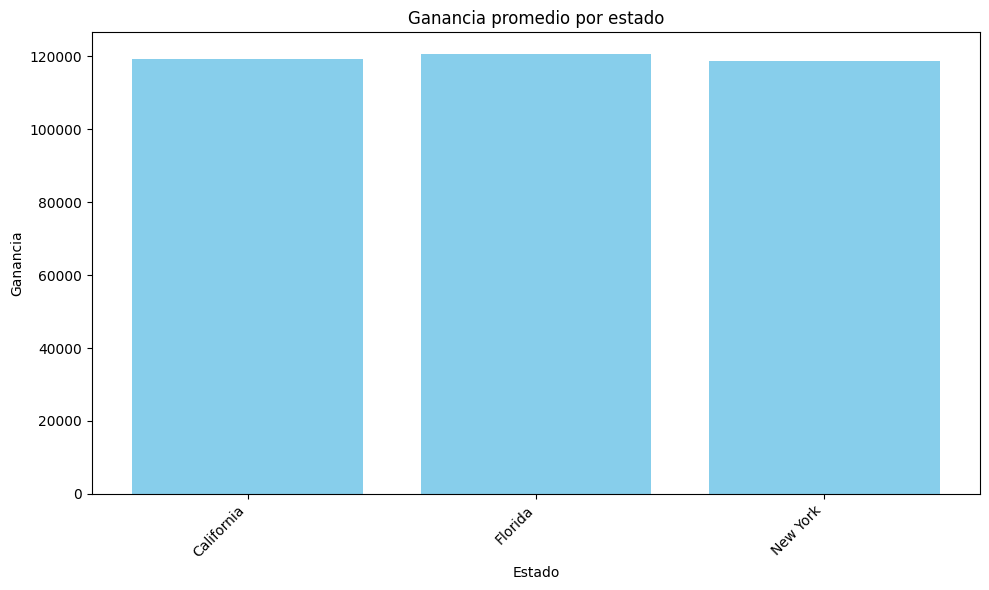

In [15]:
ganancia = df.groupby('State')['Profit'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(ganancia['State'], ganancia['Profit'], color='skyblue')

plt.xlabel('Estado')
plt.ylabel('Ganancia')
plt.title('Ganancia promedio por estado')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

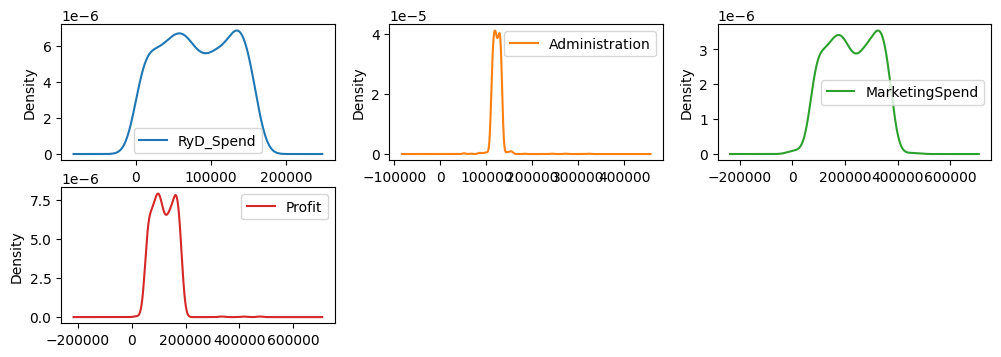

In [9]:
# Calcular si las variables se distribuyen normalmente
df.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(12, 6))
plt.show()

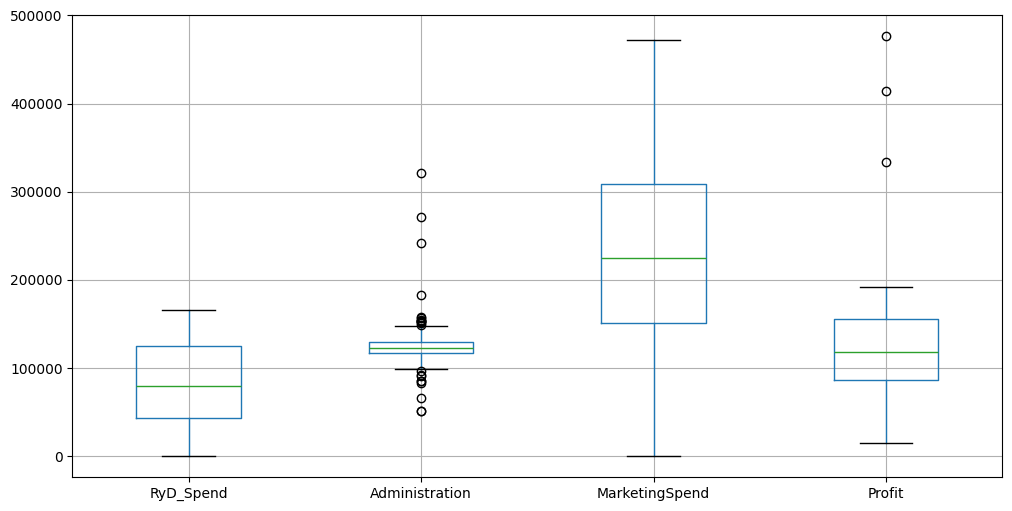

In [10]:
plt.figure(figsize=(12, 6))
df.boxplot()
plt.show()


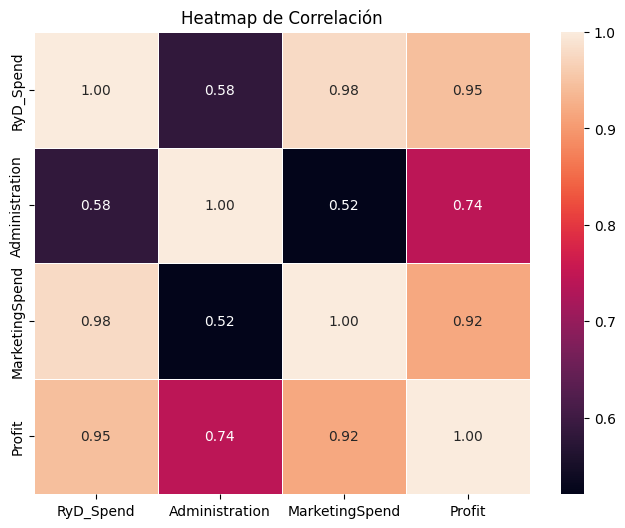

In [19]:
# Estudio la correlacion de los datos
df_subset = df[['RyD_Spend', 'Administration', 'MarketingSpend', 'Profit']]
correlation_matrix = df_subset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación")
plt.show()

La variable que mas correlacion con profit tiene es 'RyD_Spend' aunque de todas maneras todas las demas tienen tambien valores altos.

## Estandarización de los datos


División previa en train y test para evitar la fuga de datos y creo dummies para los tres estados

In [22]:
df_company_dummies = pd.get_dummies(df, columns=['State'])
df_company_dummies.head()

,RyD_Spend,Administration,MarketingSpend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False,False
2,153441.51,101145.55,407934.54,191050.39,False,True,False
3,144372.41,118671.85,383199.62,182901.99,False,False,True
4,142107.34,91391.77,366168.42,166187.94,False,True,False


In [99]:
# Division en train y test 80-20
X = df_company_dummies.iloc[:, :3]
y = df_company_dummies.iloc[:, 3]


In [100]:
X

,RyD_Spend,Administration,MarketingSpend
0,165349.20,136897.800,471784.1000
1,162597.70,151377.590,443898.5300
2,153441.51,101145.550,407934.5400
3,144372.41,118671.850,383199.6200
4,142107.34,91391.770,366168.4200
...,...,...,...
995,54135.00,118451.999,173232.6695
996,134970.00,130390.080,329204.0228
997,100275.47,241926.310,227142.8200
998,128456.23,321652.140,281692.3200


In [101]:
X_escalado = (X-X.mean())/X.std()
Y_escalado = (y-y.mean())/y.std()

In [102]:
# Agrego las columnas de los estados
X_escalado['State_California'] = df_company_dummies['State_California']
X_escalado['State_Florida'] = df_company_dummies['State_Florida']
X_escalado['State_New York'] = df_company_dummies['State_New York']
X_escalado

,RyD_Spend,Administration,MarketingSpend,State_California,State_Florida,State_New York
0,1.798123,1.104644,2.681626,False,False,True
1,1.738999,2.252565,2.377127,True,False,False
2,1.542250,-1.729703,1.984414,False,True,False
3,1.347373,-0.340263,1.714319,False,False,True
4,1.298702,-2.502958,1.528345,False,True,False
...,...,...,...,...,...,...
995,-0.591649,-0.357692,-0.578438,True,False,False
996,1.145334,0.588729,1.124708,True,False,False
997,0.399818,9.431037,0.010240,True,False,False
998,1.005366,15.751497,0.605899,True,False,False


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_escalado, Y_escalado, test_size=0.2, random_state=0)

## 2) Estimación del atributo *profit*


In [68]:
# Estimo profit con árboles de regresión
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree


In [69]:
arbol_reg = tree.DecisionTreeRegressor(max_depth=4, min_samples_leaf=5 ,random_state=23)
arbol_reg.fit(X_escalado, Y_escalado)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=23)

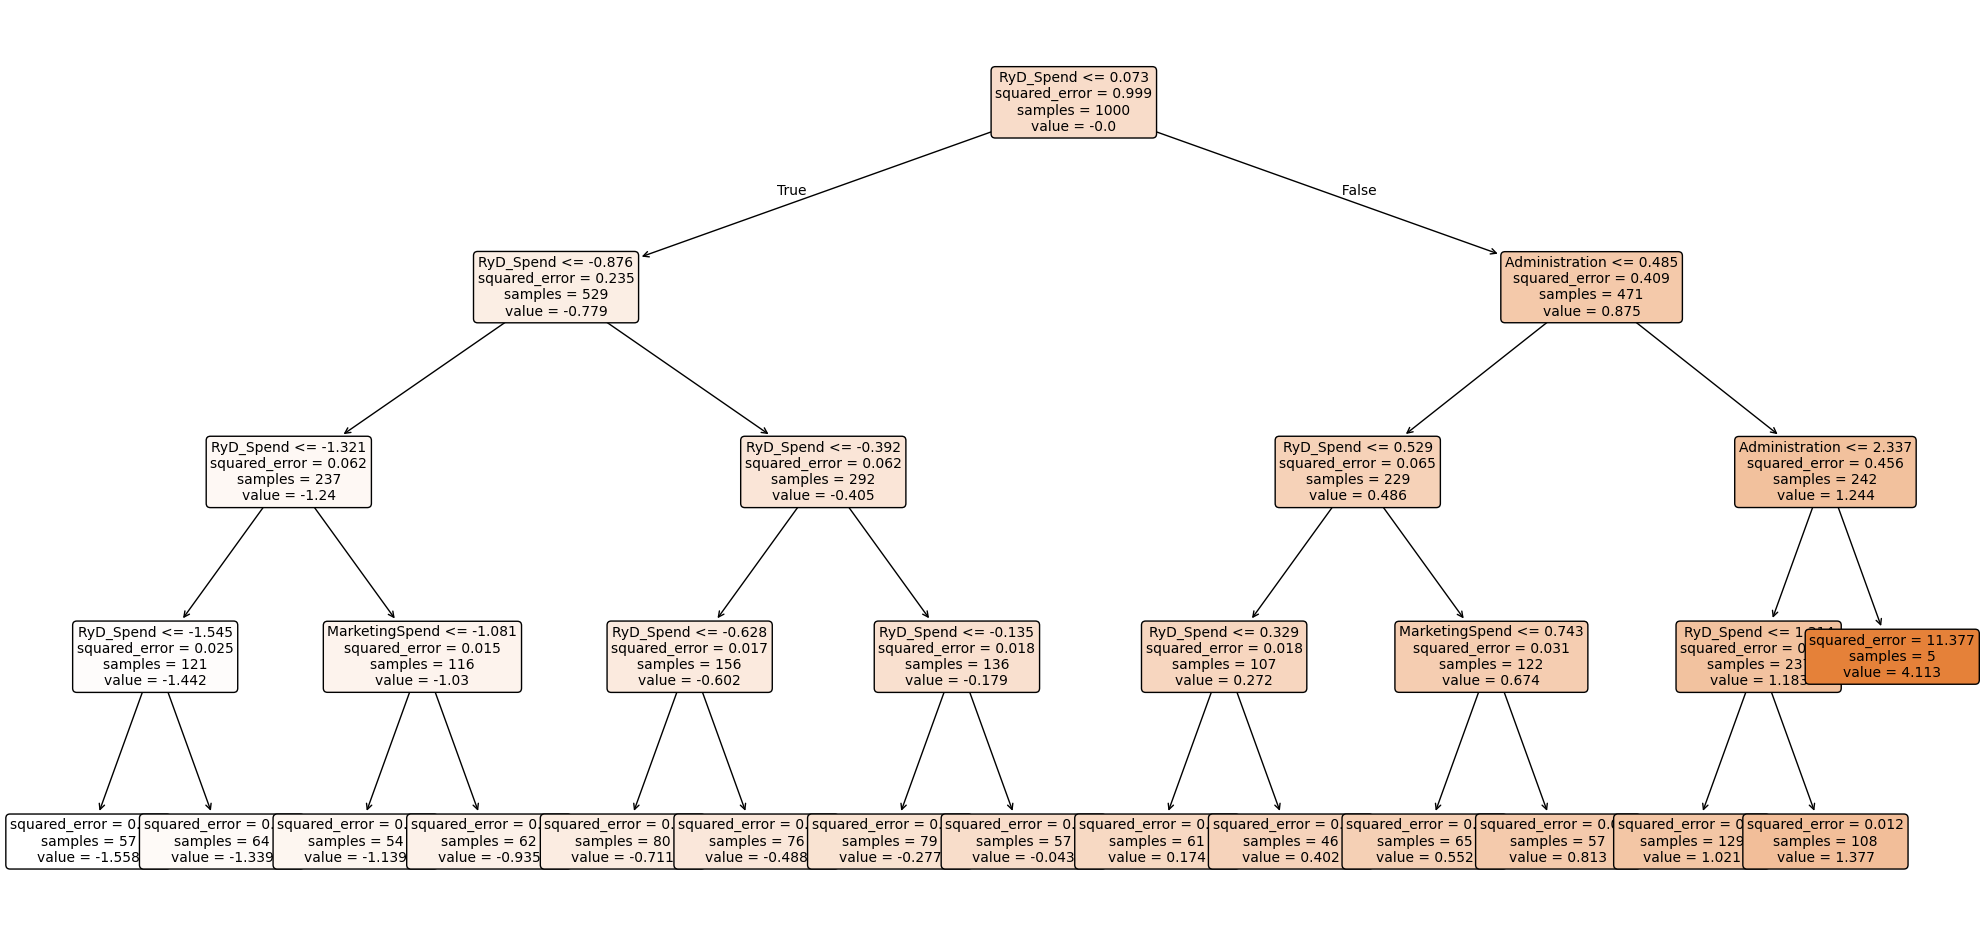

In [70]:
# plot tree
plt.figure(figsize=(25,12))
tree.plot_tree(arbol_reg, fontsize=10, feature_names=X_escalado.columns, filled=True, rounded=True)
plt.show()

# Variación de los hiperparámetros


In [71]:
# Profundidad mas grande
arbol_reg_grande = tree.DecisionTreeRegressor(
      max_depth=10, min_samples_leaf=5 ,random_state=23
      )

arbol_reg_grande.fit(X_escalado, Y_escalado)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, random_state=23)

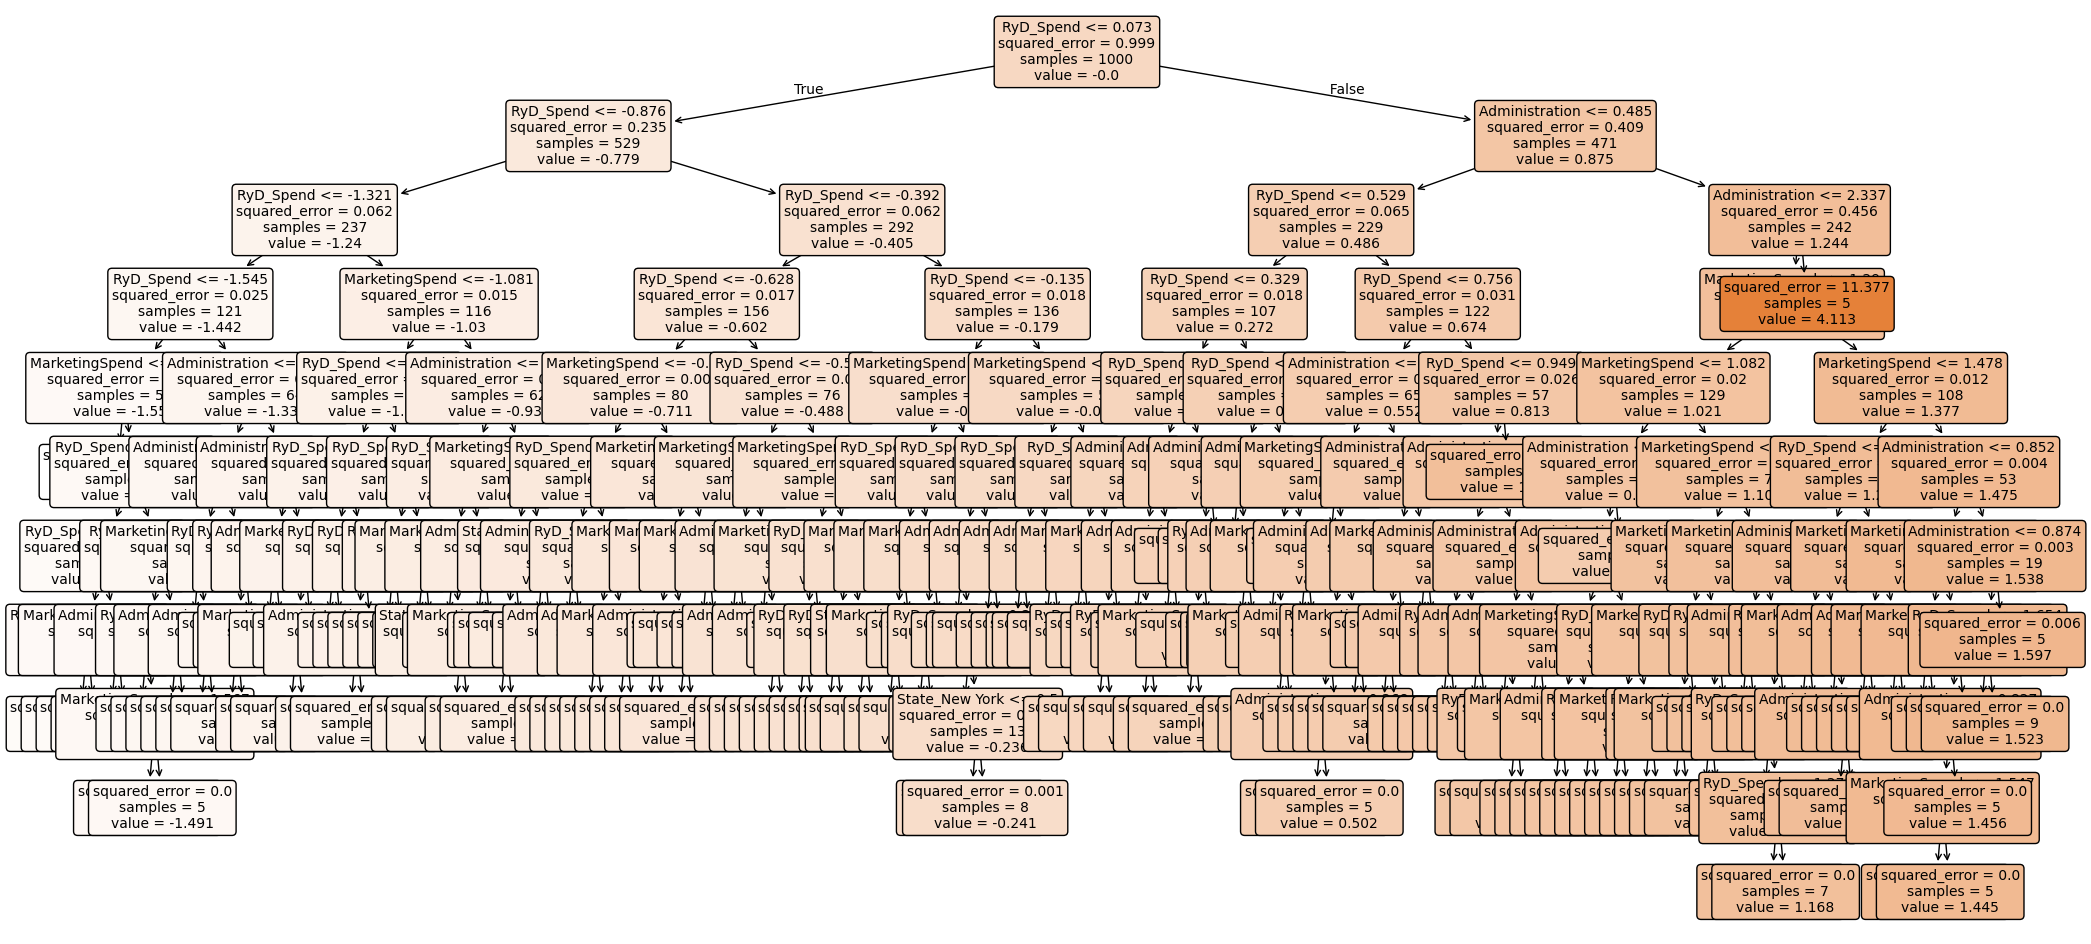

In [72]:
# Metricas
plt.figure(figsize=(25,12))
tree.plot_tree(arbol_reg_grande, fontsize=10, feature_names=X_escalado.columns, filled=True, rounded=True)
plt.show()

In [73]:
# Observaciones por hoja grande para crear divisiones mas robustas
arbol_reg_hojas = tree.DecisionTreeRegressor(
      max_depth=5, min_samples_leaf=10 ,random_state=23
      )
arbol_reg_hojas.fit(X_escalado, Y_escalado)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=23)

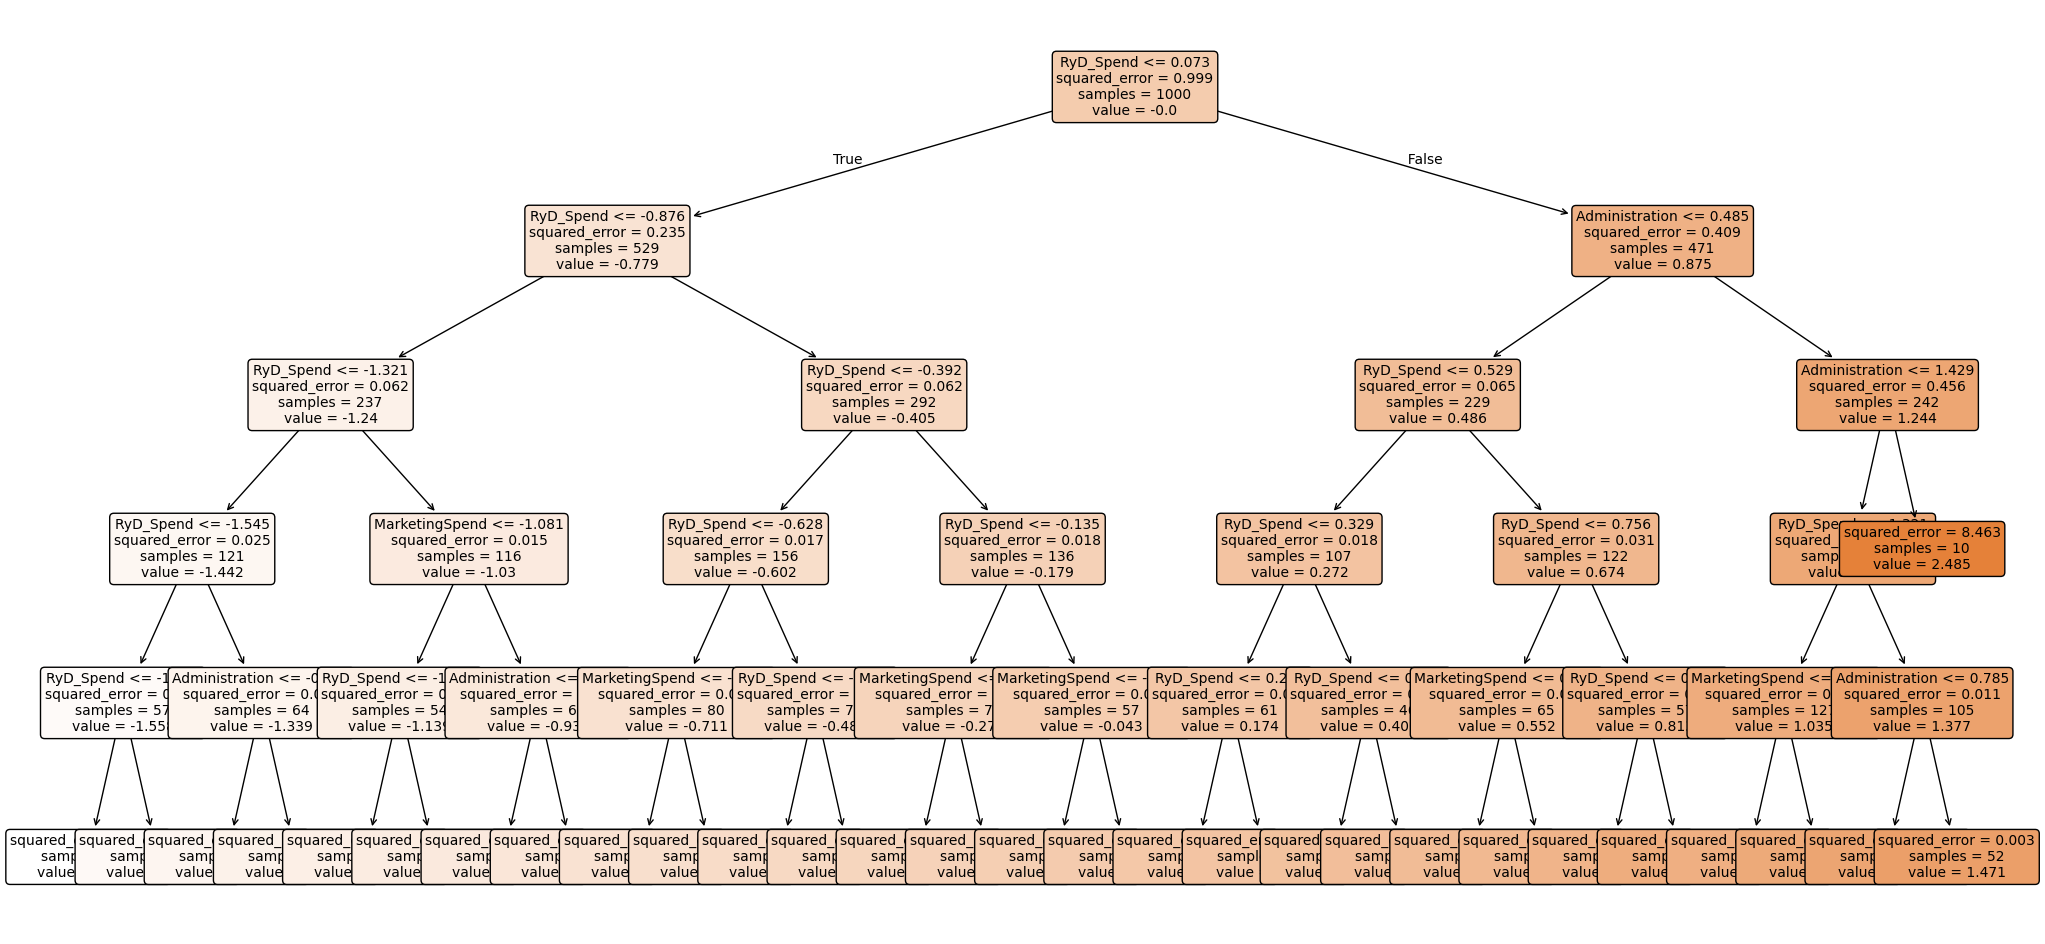

In [74]:
# Metricas
plt.figure(figsize=(25,12))
tree.plot_tree(arbol_reg_hojas, fontsize=10, feature_names=X_escalado.columns, filled=True, rounded=True)
plt.show()

In [60]:
print(f"Profundidad del árbol: {arbol_reg_hojas.get_depth()}")
print(f"Número de nodos terminales: {arbol_reg_hojas.get_n_leaves()}")

Profundidad del árbol: 5
Número de nodos terminales: 29


In [75]:
# Como predice el mismo dato cada modelo
# Inicial
y_pred_initial = arbol_reg.predict(X_test)

# Con Mayor Profundidad
y_pred_depth = arbol_reg_grande.predict(X_test)

# Con mayor muestra por hojas
y_pred_leaf = arbol_reg_hojas.predict(X_test)


In [76]:
import pandas as pd

# Crear un DataFrame para comparar los valores reales y las predicciones
comparison_df = pd.DataFrame({
    'Valor Real': y_test,
    'Predicción Inicial': y_pred_initial,
    'Predicción Profundidad Mayor': y_pred_depth,
    'Predicción Hojas Mayor': y_pred_leaf
})

# Mostrar las primeras filas del DataFrame
print(comparison_df.head())


     Valor Real  Predicción Inicial  Predicción Profundidad Mayor  \
993   -0.711940           -0.711028                     -0.717073   
859   -0.743591           -0.711028                     -0.748969   
298   -0.593463           -0.487980                     -0.588286   
553    1.302212            1.377117                      1.304998   
672   -0.843803           -0.934620                     -0.828074   

     Predicción Hojas Mayor  
993               -0.764888  
859               -0.764888  
298               -0.550718  
553                1.285815  
672               -0.884544  


### Métricas


In [78]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluar el modelo inicial
mse_initial = mean_squared_error(y_test, y_pred_initial)
r2_initial = r2_score(y_test, y_pred_initial)
mae_initial = mean_absolute_error(y_test, y_pred_initial)

# Evaluar el modelo con mayor profundidad
mse_depth = mean_squared_error(y_test, y_pred_depth)
r2_depth = r2_score(y_test, y_pred_depth)
mae_depth = mean_absolute_error(y_test, y_pred_depth)

# Evaluar el modelo con mayor número de muestras por hoja
mse_leaf = mean_squared_error(y_test, y_pred_leaf)
r2_leaf = r2_score(y_test, y_pred_leaf)
mae_leaf = mean_absolute_error(y_test, y_pred_leaf)

# Mostrar los resultados
print("Modelo Inicial:")
print(f"MSE: {mse_initial:.4f}, R²: {r2_initial:.4f}, MAE: {mae_initial:.4f}")

print("\nModelo con Mayor Profundidad:")
print(f"MSE: {mse_depth:.4f}, R²: {r2_depth:.4f}, MAE: {mae_depth:.4f}")

print("\nModelo con Mayor Muestra por Hojas:")
print(f"MSE: {mse_leaf:.4f}, R²: {r2_leaf:.4f}, MAE: {mae_leaf:.4f}")


Modelo Inicial:
MSE: 0.1680, R²: 0.8573, MAE: 0.1073

Modelo con Mayor Profundidad:
MSE: 0.1635, R²: 0.8611, MAE: 0.0528

Modelo con Mayor Muestra por Hojas:
MSE: 0.2149, R²: 0.8175, MAE: 0.0878


En conclusión, el modelo con mayor profundidad es el que tiene mejor precisión porque su mse es el mas bajo, al igual que el mae lo que indica que el modelo es el que mejor predice los valores. Además, el R2 es el mas alto de los 3

# Pokemon


## Analisis Exploratorio

In [90]:
df_2 = pd.read_csv('/content/MINERIA/tp2_2024/PokemonDBCart.csv')

In [91]:
df_2.head()

,Nombre,Ataque,Defensa,Velocidad,HP,SpAtaque,SpDefensa,TipoPokemon
0,Bulbasaur,49,49,45,45,65,65,hierba
1,Ivysaur,62,63,60,60,80,80,hierba
2,Venusaur,100,123,80,80,122,120,hierba
3,Charmander,52,43,65,39,60,50,fuego
4,Charmeleon,64,58,80,58,80,65,fuego


In [89]:
df_2.describe()

,Ataque,Defensa,Velocidad,HP,SpAtaque,SpDefensa
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,73.956159,70.657620,66.377871,66.705637,72.778706,70.824635
std,31.507258,29.291417,29.638710,24.807185,32.253524,28.020811
min,5.000000,5.000000,5.000000,1.000000,10.000000,20.000000
25%,50.000000,50.000000,45.000000,50.000000,50.000000,50.000000
50%,70.000000,65.000000,64.000000,65.000000,69.000000,66.000000
75%,94.500000,85.000000,85.000000,78.000000,95.000000,90.000000
max,185.000000,230.000000,180.000000,255.000000,194.000000,230.000000


In [83]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Nombre       479 non-null    object
 1   Ataque       479 non-null    int64 
 2   Defensa      479 non-null    int64 
 3   Velocidad    479 non-null    int64 
 4   HP           479 non-null    int64 
 5   SpAtaque     479 non-null    int64 
 6   SpDefensa    479 non-null    int64 
 7   TipoPokemon  479 non-null    object
dtypes: int64(6), object(2)
memory usage: 30.1+ KB


In [84]:
df_2.isna().sum()

,0
Nombre,0
Ataque,0
Defensa,0
Velocidad,0
HP,0
SpAtaque,0
SpDefensa,0
TipoPokemon,0


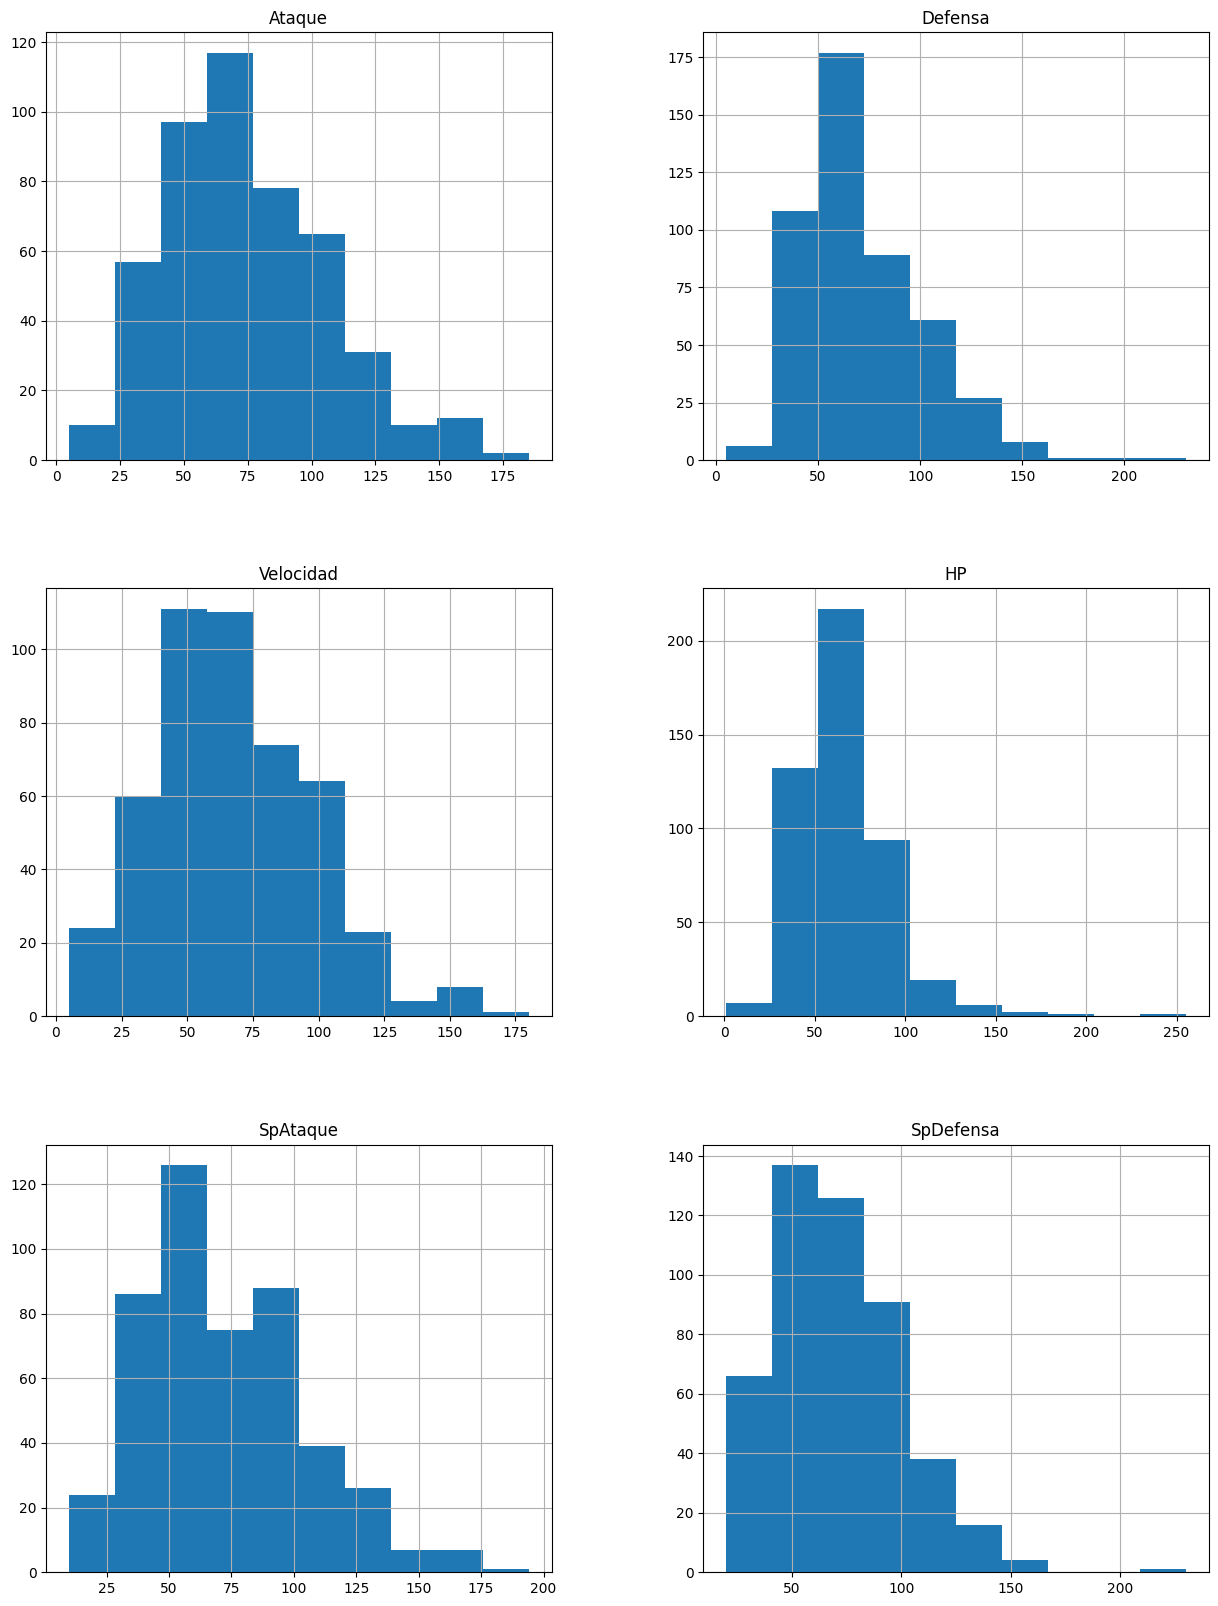

In [87]:
df_2.hist(figsize=(15, 20))
plt.show()

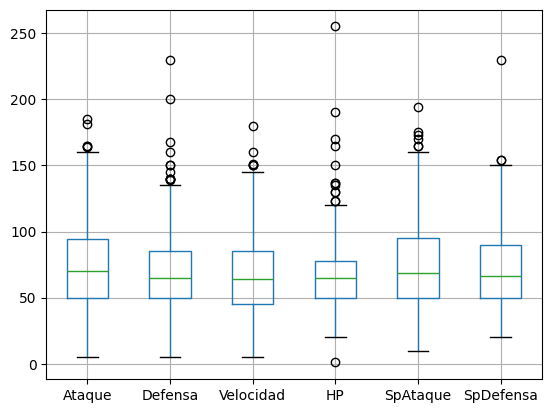

In [88]:
df_2.boxplot()
plt.show()

### Correlación


<Axes: >

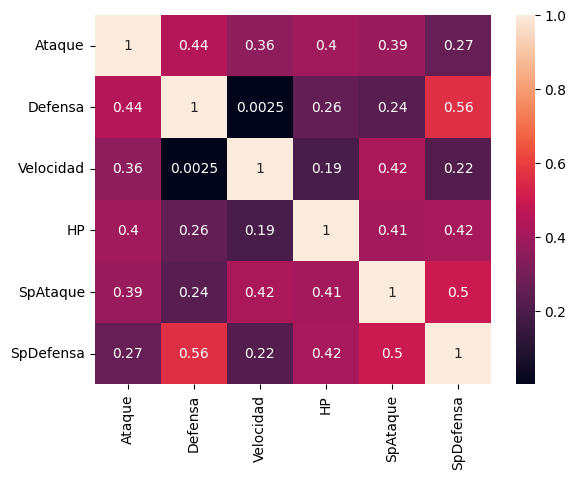

In [94]:
correlation_df_2 = df_2[['Ataque', 'Defensa', 'Velocidad', 'HP', 'SpAtaque', 'SpDefensa']].corr()
sns.heatmap(correlation_df_2, annot=True)

La variable de mayor correlacion son la de defensa y Sp defensa, seguidas por defensa y ataque

## Division de los datos


In [95]:
df_2_limpio = df_2.drop(['Nombre'], axis=1)

In [110]:
X_2 = df_2_limpio.drop(['TipoPokemon'], axis=1)
y_2 = df_2_limpio['TipoPokemon']


Primero divido en 80 - 20 y luego en 70 - 30 con el mismo random state


In [111]:
# 80 - 20
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=0)

In [112]:
# 70 - 30
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [113]:
y_test

,TipoPokemon
15,normal
124,agua
141,agua
263,agua
170,hierba
...,...
415,roca
416,roca
107,agua
461,normal


In [120]:
#Nombre de cada clase única
df_2['TipoPokemon'].unique()

array(['hierba', 'fuego', 'agua', 'bicho', 'normal', 'electrico',
       'psiquico', 'roca'], dtype=object)

## Estimación de "TipoPokemon" - Árbol

In [114]:
# Estandarizacion del primer test
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [131]:
# Arbol con valores default
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [132]:
clf_predictions_train = tree_clf.predict(X_train_scaled)
clf_predictions = tree_clf.predict(X_test_scaled)


In [133]:
train_labels = y_train
test_labels = y_test # Assuming y_test is your test labels

print(f'{accuracy_score(train_labels, clf_predictions_train)}')
print(f'{accuracy_score(test_labels, clf_predictions)}')


0.9973890339425587
0.3020833333333333


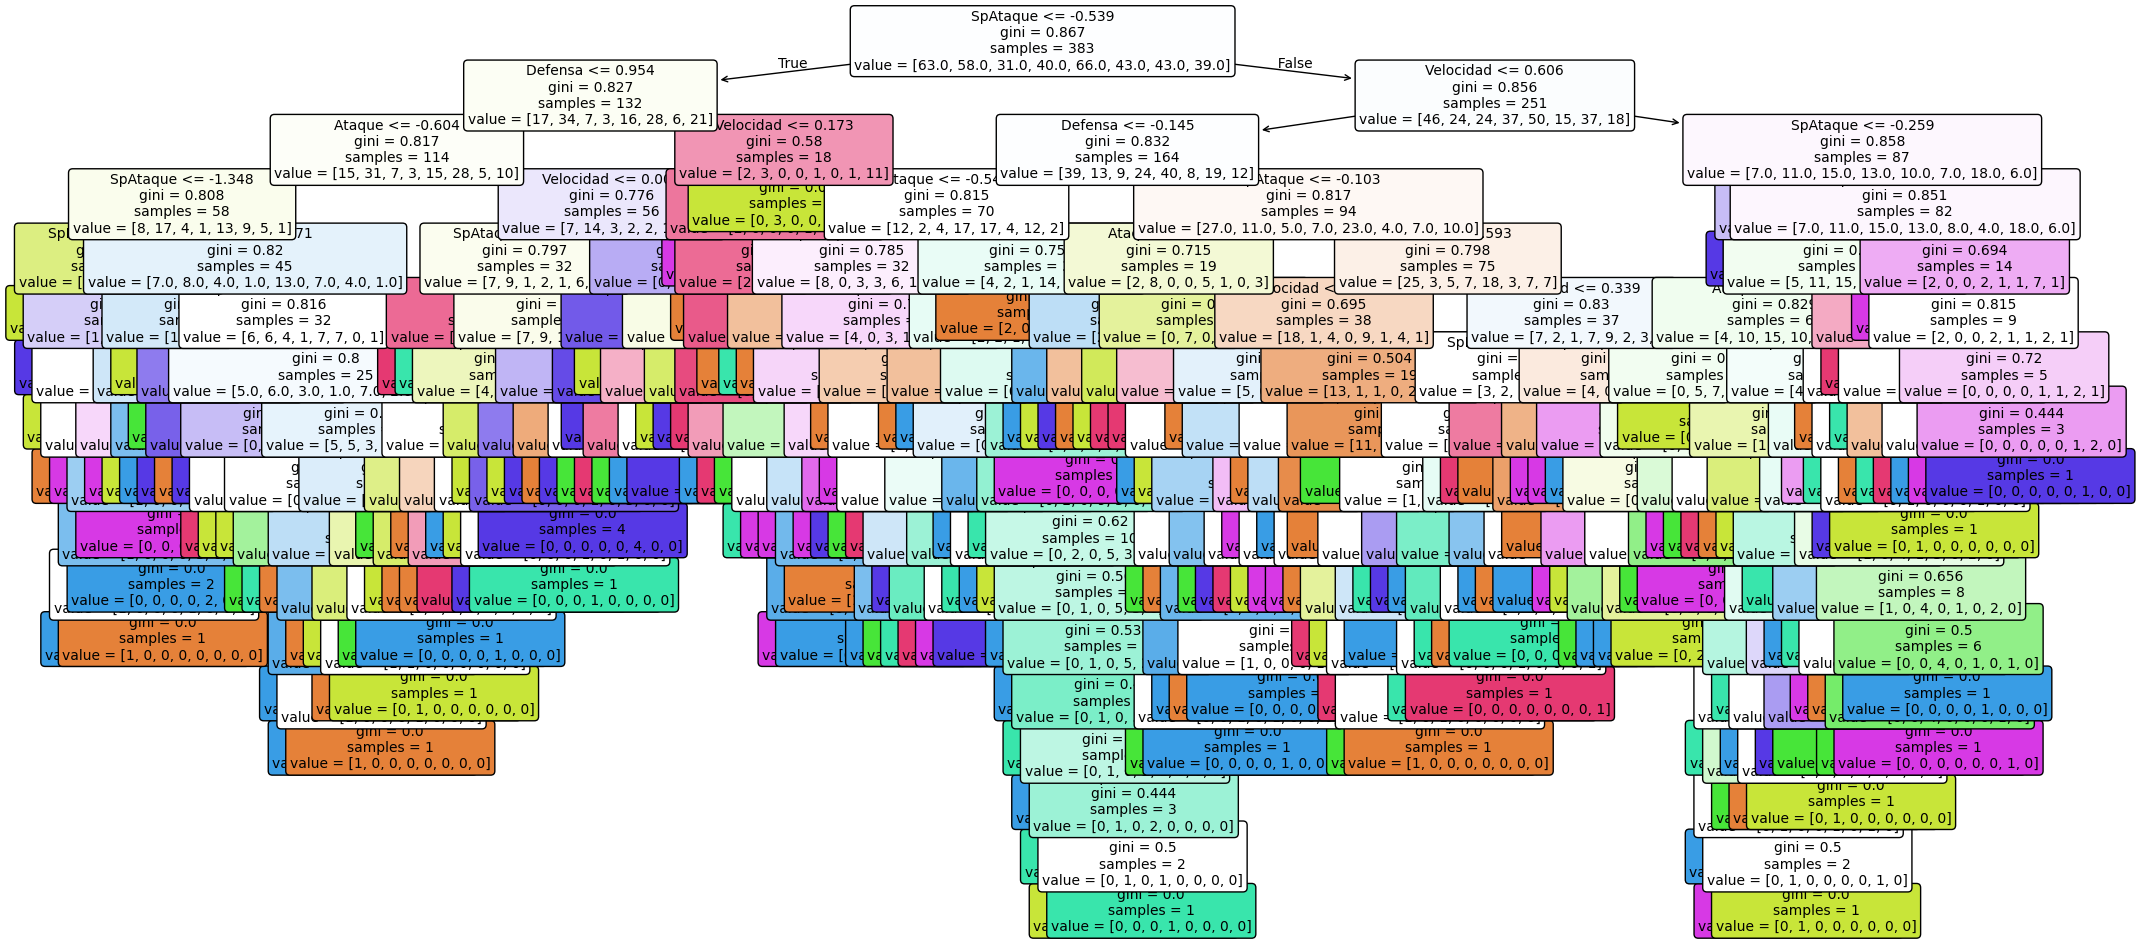

In [134]:
# Muestro el arbol
plt.figure(figsize=(25,12))
tree.plot_tree(tree_clf, fontsize=10, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

In [135]:
# Metricas
print(classification_report(y_test, clf_predictions))

              precision    recall  f1-score   support

        agua       0.40      0.47      0.43        17
       bicho       0.42      0.36      0.38        14
   electrico       0.25      0.12      0.17         8
       fuego       0.25      0.25      0.25        12
      hierba       0.16      0.25      0.19        12
      normal       0.50      0.18      0.26        17
    psiquico       0.27      0.30      0.29        10
        roca       0.25      0.50      0.33         6

    accuracy                           0.30        96
   macro avg       0.31      0.30      0.29        96
weighted avg       0.34      0.30      0.30        96



In [137]:
# Aplico poda
tree_clf_pruned = DecisionTreeClassifier(max_depth=6)
tree_clf_pruned.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=6)

In [140]:
# Entreno
clf_predictions_train_pruned = tree_clf_pruned.predict(X_train_scaled)
clf_predictions_pruned = tree_clf_pruned.predict(X_test_scaled)

In [141]:
# Testeo
print(f'{accuracy_score(train_labels, clf_predictions_train_pruned)}')
print(f'{accuracy_score(test_labels, clf_predictions_pruned)}')

0.5274151436031331
0.3229166666666667


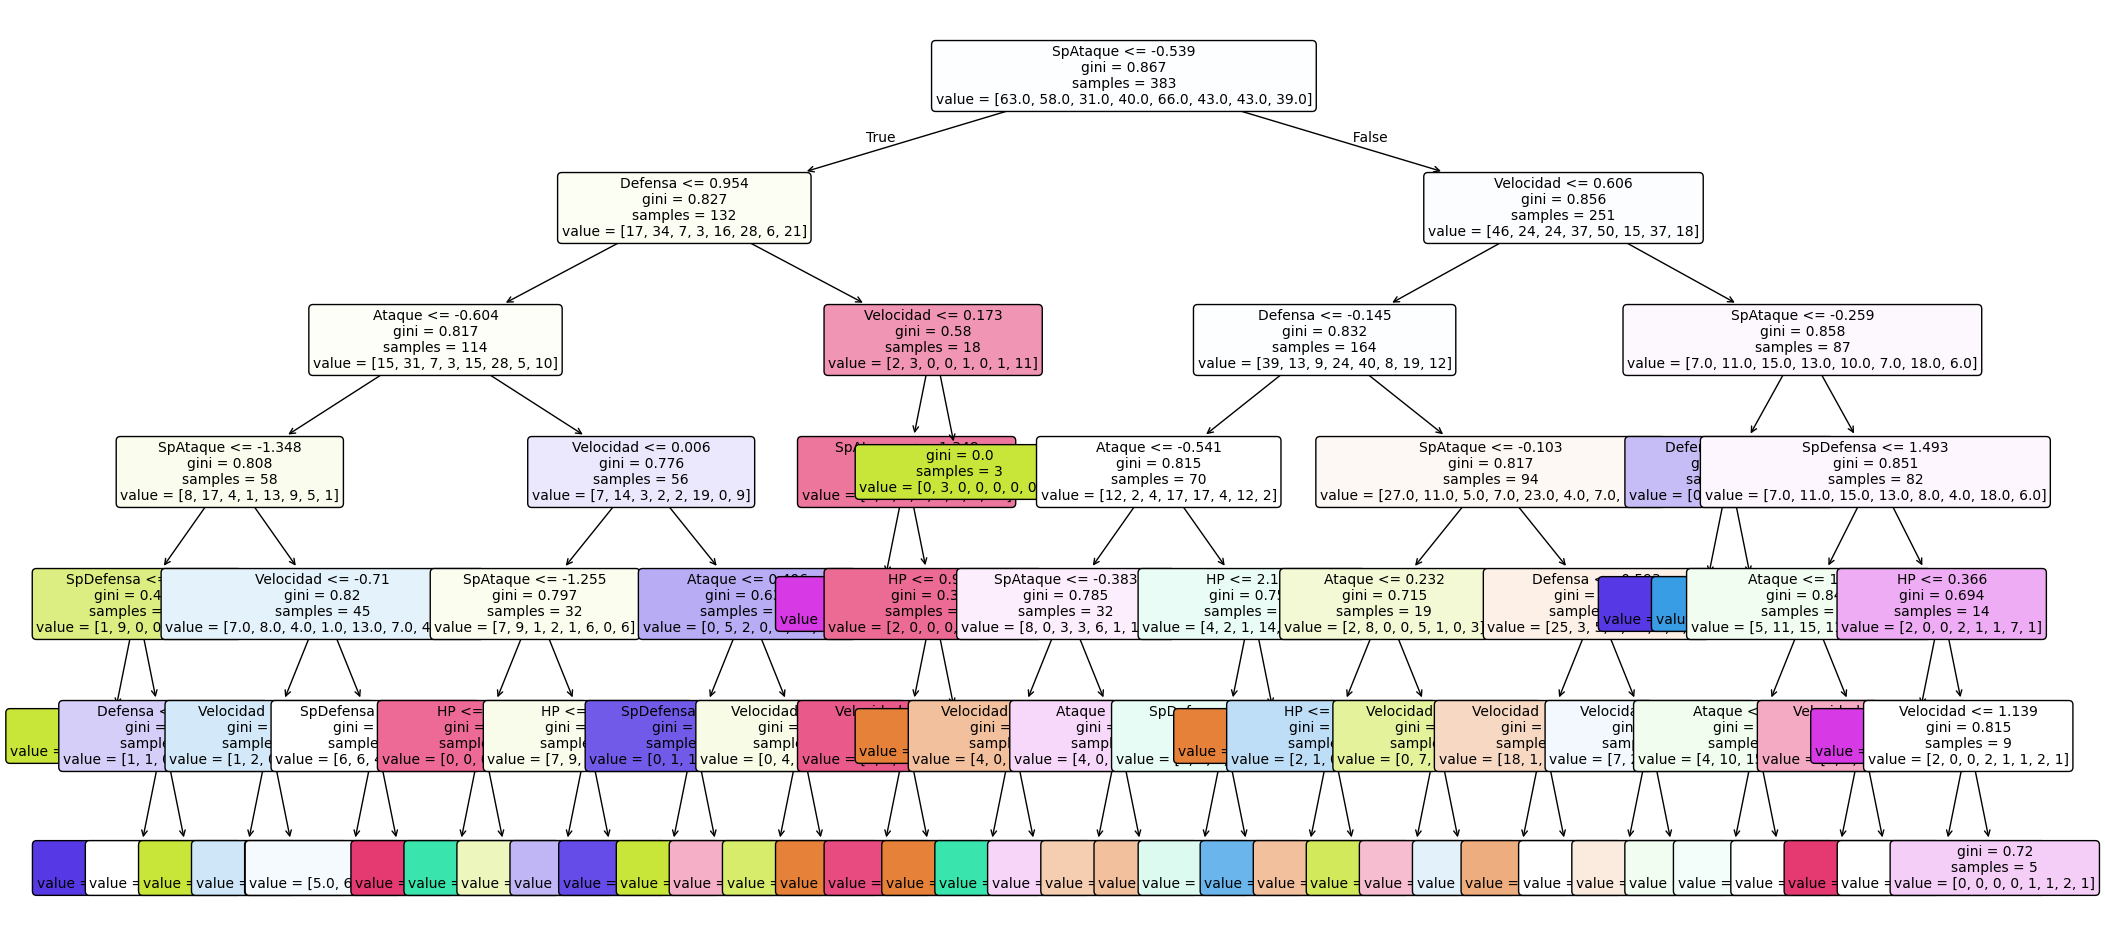

In [142]:
# Grafico
plt.figure(figsize=(25,12))
tree.plot_tree(tree_clf_pruned, fontsize=10, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

In [143]:
# Métricas
print(classification_report(y_test, clf_predictions_pruned))

              precision    recall  f1-score   support

        agua       0.57      0.47      0.52        17
       bicho       0.30      0.21      0.25        14
   electrico       0.50      0.12      0.20         8
       fuego       0.29      0.75      0.42        12
      hierba       0.17      0.25      0.20        12
      normal       0.67      0.24      0.35        17
    psiquico       0.14      0.10      0.12        10
        roca       0.25      0.33      0.29         6

    accuracy                           0.32        96
   macro avg       0.36      0.31      0.29        96
weighted avg       0.39      0.32      0.31        96



## Estimación de "TipoPokemon" - Bayes Ingenuo


## Estimación de "TipoPokemon" - k-NN